In [48]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!mkdir -p "/content/drive/My Drive/MNIST_Digit_Classification_models"

In [50]:
#Loading in dataset

(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [51]:
#Normalizing inputs 
x_train, x_test  = x_train / 255., x_test / 255.

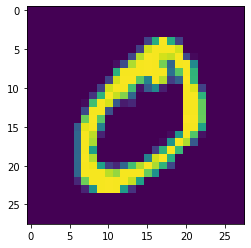

In [52]:
#Looking at our data

image_index = 1
plt.imshow(x_train[image_index])

In [53]:
#Dimensions of matrices

print("X_train shape", x_train.shape)
print("X_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [54]:
print(y_train[4])

9


In [57]:
#Designing network architecutre, compile model, train model

model_input = tf.keras.Input(shape = (28, 28))
F = tfl.Flatten()(model_input)
D1 = tfl.Dense(units = 128, activation = 'relu')(F)
D2 = tfl.Dense(units = 64, activation = 'relu')(D1)
outputs = tfl.Dense(units = 10, activation = 'softmax')(D2)

model = tf.keras.Model(inputs = model_input, outputs = outputs)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

history = model.fit(train_dataset, epochs = 4, validation_data = test_dataset)

Epoch 1/4
938/938 [==============================] - 5s 4ms/step - loss: 0.2890 - accuracy: 0.9175 - val_loss: 0.1583 - val_accuracy: 0.9503
Epoch 2/4
938/938 [==============================] - 4s 4ms/step - loss: 0.1244 - accuracy: 0.9626 - val_loss: 0.1219 - val_accuracy: 0.9620
Epoch 3/4
938/938 [==============================] - 4s 4ms/step - loss: 0.0852 - accuracy: 0.9750 - val_loss: 0.1100 - val_accuracy: 0.9643
Epoch 4/4
938/938 [==============================] - 4s 4ms/step - loss: 0.0625 - accuracy: 0.9818 - val_loss: 0.0977 - val_accuracy: 0.9703


In [61]:
def check(num):
  print("Predicted class:", np.argmax(model.predict(x_test)[num]))
  print("Actual class:", y_test[num])
  plt.figure()
  plt.imshow(x_test[num])
  plt.show()

Predicted class: 3
Actual class: 3


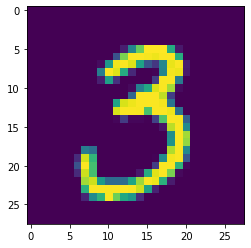

In [62]:
check(90)

In [63]:
model.save("/content/drive/My Drive/MNIST_Digit_Classification_models/model1.h5")